In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from adjustText import adjust_text
from datasets import load_dataset

# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [3]:
type(df['job_skills'][1])

list

In [4]:
df_DA_US = df[(df['job_title_short']=='Data Analyst')& (df['job_country']=='United States')].copy()

In [5]:
df_DA_US.size

1152872

Text(0, 0.5, 'number of jobs')

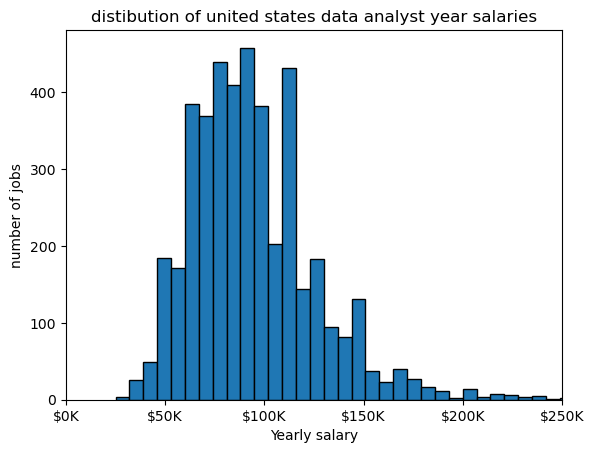

In [7]:
df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 50, edgecolor = 'black')
plt.xlim(0, 250000)

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('distibution of united states data analyst year salaries')
plt.xlabel('Yearly salary')
plt.ylabel('number of jobs')